<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Tarefa_16_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Dropout
import matplotlib.pyplot as plt
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(previsores_treinamento, _), (previsores_teste, _) = cifar10.load_data()

In [0]:
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [4]:
autoencoder = Sequential()

In [5]:
#encoder
autoencoder.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu',
                       input_shape = (32, 32, 3)))
autoencoder.add(MaxPooling2D(pool_size = (2, 2)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same'))# se nao colocar o parametro same quando executar ira dar erro
autoencoder.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))#pois este parametro indica como que a imagem sera passado, o seu formato no caso, que é linhas, colunas e canais
#4, 4, 8
autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same',
                       strides = (2, 2)))#strides idicas de quantos em quantos pixels a imagem anda, 2, 2 nesse caso
#aqui não vai maxpooling porque é o final da rede neural
autoencoder.add(Flatten())#transforma de formato matriz para uma lista com 128 posiçoes pois 4 * 4 * 8 == 128

autoencoder.add(Reshape((4, 4, 8)))#volta a lista para uma matriz 4, 4, 8

In [6]:
#decoder
autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
autoencoder.add(UpSampling2D(size = (2, 2)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
autoencoder.add(UpSampling2D(size = (2, 2)))

autoencoder.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same'))#para o ultimo não podemos preencher o padding same pois a dimensão de saida sera diferente da dimensão de entrada graças a ele
autoencoder.add(UpSampling2D(size = (2, 2)))

autoencoder.add(Conv2D(filters = 3, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same'))#retorna a imagem decodificada já

In [7]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)          

In [8]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 50, batch_size = 32,
                validation_data = (previsores_teste, previsores_teste))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 26s 511us/step - loss: 0.5933 - acc: 0.0118 - val_loss: 0.5826 - val_acc: 0.0121
Epoch 2/50
50000/50000 [==============================] - 23s 456us/step - loss: 0.5796 - acc: 0.0120 - val_loss: 0.5792 - val_acc: 0.0121
Epoch 3/50
 4512/50000 [=>............................] - ETA: 20s - loss: 0.5795 - acc: 0.0117

KeyboardInterrupt: ignored

In [9]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_1').output)#pega a cada que voce deseja, no caso flatten_1 é a camada que faz o encoder final do programa
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0   

In [0]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

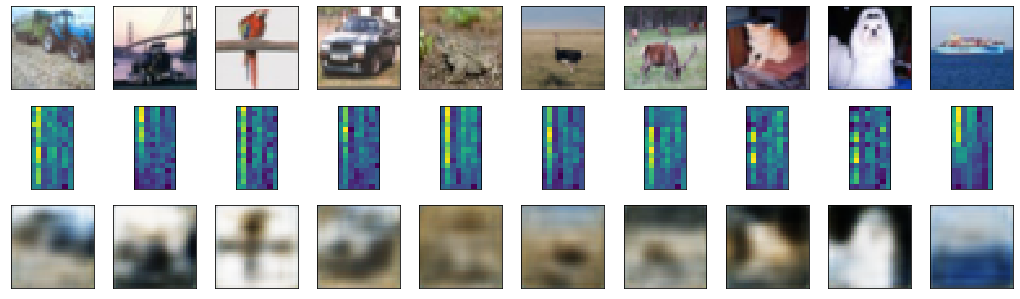

In [11]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)# seleciona 10 imagens e um intervalo de 0 a 10000
plt.figure(figsize=(18, 18))
for i, indice_imagem in enumerate(imagens_teste):
  # imagem original
  eixo = plt.subplot(10, 10, i + 1)
  plt.imshow(previsores_teste[indice_imagem].reshape(32, 32, 3))
  plt.xticks(())
  plt.yticks(())
    
  # imagem codificada
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
  plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 8))
  plt.xticks(())
  plt.yticks(())
    
  # imagem reconstrui­da
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(32, 32, 3))
  plt.xticks(())
  plt.yticks(())